## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명: 딥러닝알고리즘 구현
- 평가일: 22.04.22
- 성명:이재우
- 점수:95

Q1. 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리하여 문장에 있은 의미를 자연스럽게 표현하려는 목적으로 과거 정보를 사용하고 새롭게 얻은 정보를 계속 업데이트하는 방식이 순환 신경망(RNN) 이다. SimpleRNN을 활용하여 IMDB 영화 리뷰 데이터에 대하여 아래 사항을 수행하세요.
- 데이터 전처리 : max_features 10000, maxlen = 500, batch_size 32
- 케라스를 사용하여 입력 시퀀스에 대한 마지막 출력만 반환하는 방식으로 모델링.(embedding 층 입력 (max_features, 32))
- 학습 및 검증 옵션 : epochs 10, batch_size 128, 검증 데이터 20%
※ 학습시간 20분
- 훈련과 검증의 손실과 정확도를 그래프로 표현
- 검증 정확도를 확인하고 동 사례에 SimpleRNN 모델의 적합 여부 및 개선 방안에 대하여 기술하세요.

In [2]:
# 전처리
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(X_train, y_train) , (X_test,y_test) = imdb.load_data(num_words = max_features)

X_train = sequence.pad_sequences(X_train,maxlen=maxlen)

X_test = sequence.pad_sequences(X_test,maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential

model =Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(X_train,y_train,
                    epochs=10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 71s 433ms/step - loss: 0.6120 - acc: 0.6447 - val_loss: 0.6694 - val_acc: 0.6434
Epoch 2/10
157/157 [==============================] - 87s 556ms/step - loss: 0.3788 - acc: 0.8386 - val_loss: 0.3752 - val_acc: 0.8388
Epoch 3/10
157/157 [==============================] - 71s 455ms/step - loss: 0.2861 - acc: 0.8871 - val_loss: 0.4428 - val_acc: 0.7870
Epoch 4/10
157/157 [==============================] - 69s 438ms/step - loss: 0.2404 - acc: 0.9066 - val_loss: 0.4609 - val_acc: 0.7856
Epoch 5/10
157/157 [==============================] - 65s 414ms/step - loss: 0.1682 - acc: 0.9380 - val_loss: 0.3539 - val_acc: 0.8740
Epoch 6/10
157/157 [==============================] - 75s 475ms/step - loss: 0.1149 - acc: 0.9602 - val_loss: 0.3869 - val_acc: 0.8658
Epoch 7/10
157/157 [==============================] - 78s 499ms/step - loss: 0.0802 - acc: 0.9741 - val_loss: 0.4815 - val_acc: 0.8244
Epoch 8/10
157/157 [==============================] - 8

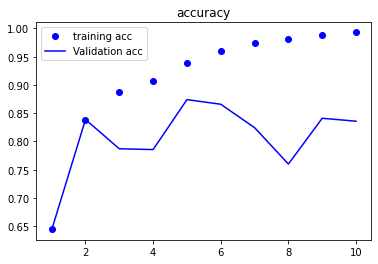

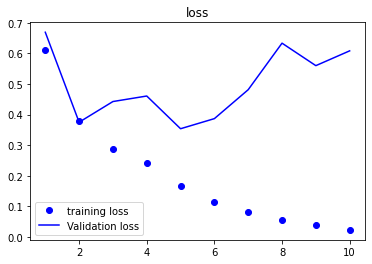

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('loss')
plt.legend()

plt.show()

simpleRNN 을 사용한 모델은 평균적인 loss 0.28 보다 더 큰 0.39의 loss를 보여 잘 학습이 된 것처럼 보이지는 않는다. 간단한 순환층인 simpleRNN보다 더 잘 학습할 수 있는 고급 순환 층을 사용해볼 필요가 있다

Q2. Q1 문제를 LSTM 모델을 적용하여 수행하세요
- 모델링, 학습 및 검증
- 결과 시각화

In [6]:
#  LSTM 적용
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential

model =Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(X_train,y_train,
                    epochs=10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 7s 27ms/step - loss: 0.5108 - acc: 0.7553 - val_loss: 0.5315 - val_acc: 0.7636
Epoch 2/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2927 - acc: 0.8867 - val_loss: 0.2984 - val_acc: 0.8818
Epoch 3/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2359 - acc: 0.9103 - val_loss: 0.2730 - val_acc: 0.8910
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1930 - acc: 0.9281 - val_loss: 0.3536 - val_acc: 0.8504
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1765 - acc: 0.9375 - val_loss: 0.3293 - val_acc: 0.8794
Epoch 6/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1597 - acc: 0.9433 - val_loss: 0.3022 - val_acc: 0.8768
Epoch 7/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1422 - acc: 0.9477 - val_loss: 0.4137 - val_acc: 0.8348
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

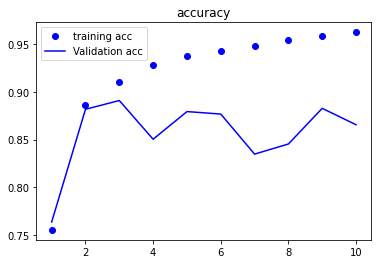

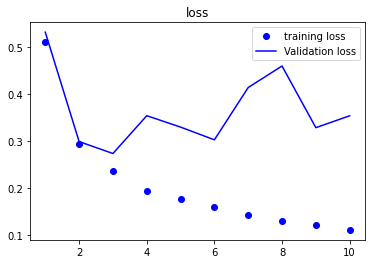

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('loss')
plt.legend()

plt.show()

Q3. MNIST 숫자 이미지 데이터에 대하여 CNN 모델을 사용하여 아래사항을 수행하세요
- Conv2D와 MaxPooling2D 층을 사용하여 컨브넷을 생성(채널의 수 32개 또는 64개)
- 출력 텐서를 완전 연결 네트워크에 주입
- 10개의 클래스 분류하기 위한 분류기 추가
- 컨브넷 학습 및 평가

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_img, train_label), (test_img,test_label) = mnist.load_data()
train_img = train_img.reshape((60000,28,28,1))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape((10000,28,28,1))
test_img = test_img.astype('float32')/255

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [13]:
# 모델 생성
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_img, train_label, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 10s 4ms/step - loss: 0.1759 - accuracy: 0.9451
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0338 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0208 - accuracy: 0.9937


In [14]:
model.evaluate(test_img,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0238 - accuracy: 0.9927


[0.023766104131937027, 0.9926999807357788]

Q4. cats_and_dogs_small으로 축소한 데이터 셋으로 사전 훈련된 네트워크를 사용하여 강아지 고양이 분류 과제를 아래와 같이 수행하세요.
- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층을 사용하여 유용한 특성 추출하고 이 특성으로 분류기 훈련
- ImageDataGenerator 사용 (※ 소요시간 20분)
- VGG 매개변수
 - weights는 모델을 초기화할 가중치 체크포인트를 지정 : 'imagenet'
 - include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정 : False
 - input_shape은 네트워크에 주입할 이미지 텐서의 크기 :(150.150,3)
- 데이터 증식을 사용하지 않는 방법으로 수행
- 완전 연결 분류기를 정의하고 규제를 위해 드롭아웃 사용 : 0.5

In [17]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
# ImageDataGenerator 사용
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
base_dir = '/content/drive/MyDrive/cakd5/m9_딥러닝알고리즘구현/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory,sample_count):
  features = np.zeros(shape = (sample_count,4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for inputs_batch,  labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features,labels

train_features,train_labels = extract_features(train_dir,2000)
val_features,val_labels = extract_features(val_dir,1000)
test_features,test_labels = extract_features(test_dir,1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
train_features = np.reshape(train_features,(2000,4*4*512))
val_features = np.reshape(val_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [26]:
# 완전 분류기 사용
from tensorflow.keras import optimizers

model = Sequential()
model.add(layers.Dense(256,activation='relu',input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5),loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (val_features, val_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.5825 - acc: 0.6845 - val_loss: 0.4419 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4210 - acc: 0.8145 - val_loss: 0.3728 - val_acc: 0.8460
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3630 - acc: 0.8380 - val_loss: 0.3229 - val_acc: 0.8660
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3068 - acc: 0.8775 - val_loss: 0.2977 - val_acc: 0.8850
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2845 - acc: 0.8860 - val_loss: 0.2818 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2687 - acc: 0.8925 - val_loss: 0.2714 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2482 - acc: 0.9010 - val_loss: 0.2618 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

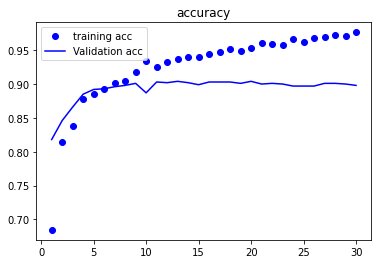

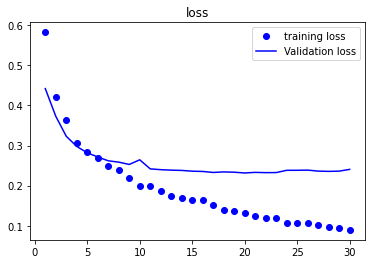

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('loss')
plt.legend()

plt.show()

Q5. Q4 문제를 데이터 증식을 사용한 방식으로 수행하세요.

In [29]:
# 데이터 증식

train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest')
val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary'
)
val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 50,
    verbose = 2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 - 25s - loss: 0.4199 - acc: 0.7955 - val_loss: 0.2688 - val_acc: 0.8660 - 25s/epoch - 252ms/step
Epoch 2/30
100/100 - 23s - loss: 0.2176 - acc: 0.9130 - val_loss: 0.1258 - val_acc: 0.9450 - 23s/epoch - 230ms/step
Epoch 3/30
100/100 - 23s - loss: 0.1454 - acc: 0.9415 - val_loss: 0.1243 - val_acc: 0.9540 - 23s/epoch - 233ms/step
Epoch 4/30
100/100 - 23s - loss: 0.1130 - acc: 0.9600 - val_loss: 0.1290 - val_acc: 0.9540 - 23s/epoch - 230ms/step
Epoch 5/30
100/100 - 23s - loss: 0.1076 - acc: 0.9630 - val_loss: 0.0977 - val_acc: 0.9640 - 23s/epoch - 231ms/step
Epoch 6/30
100/100 - 23s - loss: 0.0713 - acc: 0.9745 - val_loss: 0.1539 - val_acc: 0.9490 - 23s/epoch - 230ms/step
Epoch 7/30
100/100 - 23s - loss: 0.0582 - acc: 0.9780 - val_loss: 0.1139 - val_acc: 0.9650 - 23s/epoch - 228ms/step
Epoch 8/30
100/100 - 23s - loss: 0.0470 - acc: 0.9820 - val_loss: 0.5830 - val_acc: 0.8600 - 23s/epoch - 230ms/step
Epoch 9/30
100/100 - 23s - loss: 0.0521 - acc: 0.9815 - val_loss: 0.1179

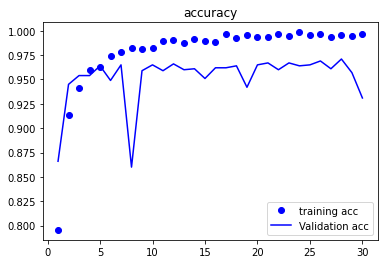

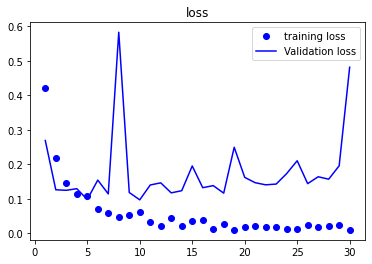

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('loss')
plt.legend()

plt.show()